Construct decision tree from calculations

In [2]:
h_df_filename_dfa = 'h_df_dfa.csv'
h_df_filename_afa = 'h_df_afa.csv'
h_df_filename_rra = 'h_df_rra.csv'

In [3]:
import os

def load_file(filename):
    if os.path.exists(filename):
        df = pd.read_csv(filename)
        return df
    return None

In [4]:
import pandas as pd

def transform_df_features(df):
    features = []
    labels = []
    
    for col in df.columns:
        for value in df[col]:
            features.append([value])
            labels.append(col)

    features_df = pd.DataFrame(features, columns=['value'])
    labels_df = pd.Series(labels, name='label')

    return features_df, labels_df

In [5]:
from sklearn.preprocessing import LabelEncoder

def column_enc(labels_df):
    label_encoder = LabelEncoder()
    numeric_labels = label_encoder.fit_transform(labels_df)
    return label_encoder, numeric_labels

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

def construct_dt(features_df, numeric_labels):
    X_train, X_test, y_train, y_test = train_test_split(features_df, numeric_labels, test_size=0.3, random_state=1)

    clf = DecisionTreeClassifier()
    clf = clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    
    return clf

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def print_tree(clf, label_encoder):
    plt.figure(figsize=(12,8))
    plot_tree(clf, filled=True, feature_names=['value'], class_names=label_encoder.classes_, max_depth=3)
    plt.show()

DFA

Accuracy: 0.10764743414456295


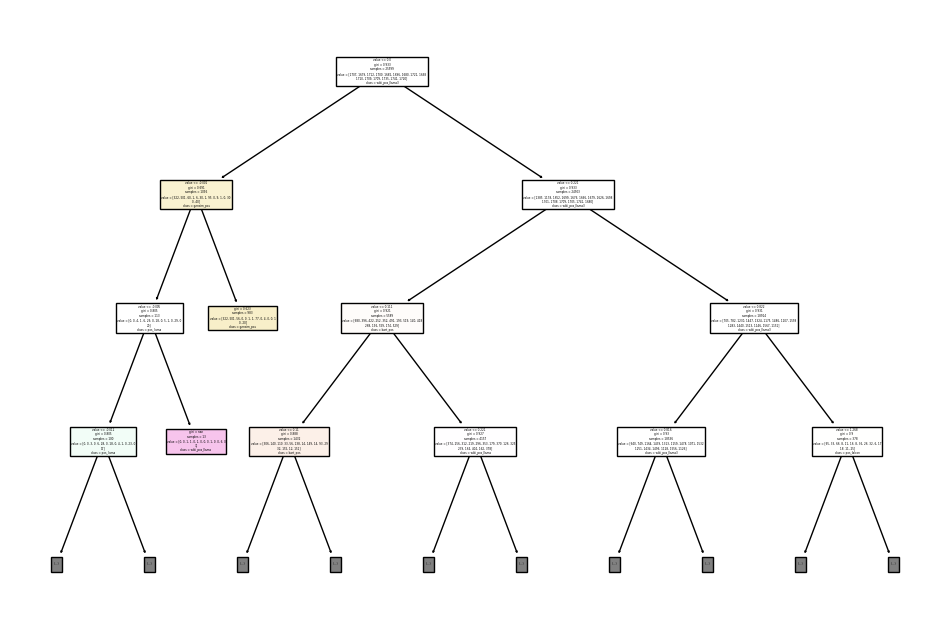

In [12]:
df = load_file(h_df_filename_dfa)

features_df, labels_df = transform_df_features(df)
label_encoder, numeric_labels = column_enc(labels_df)
clf = construct_dt(features_df, numeric_labels)
print_tree(clf, label_encoder)

AFA

Accuracy: 0.14201075562847507


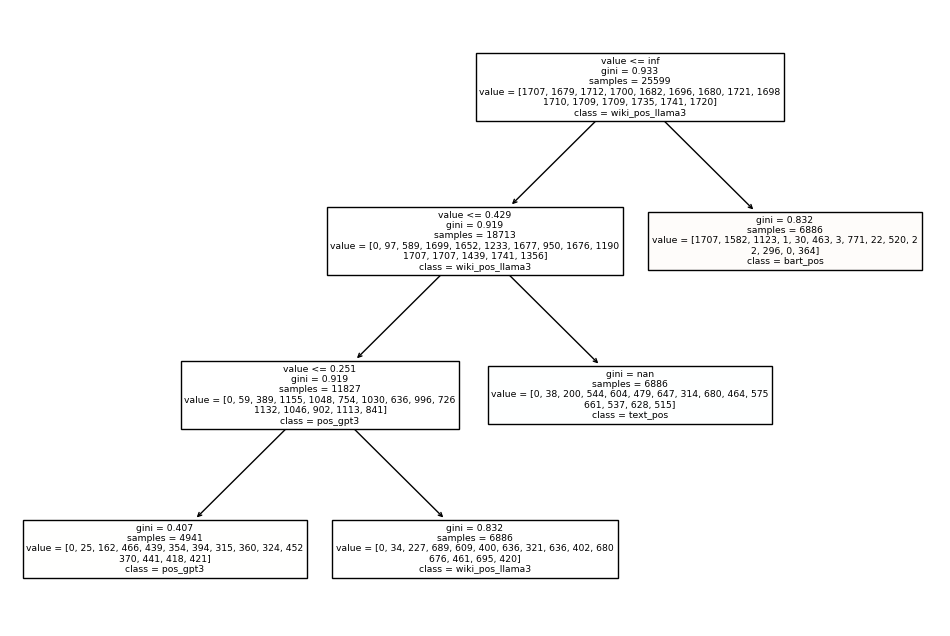

In [13]:
df = load_file(h_df_filename_afa)

features_df, labels_df = transform_df_features(df)
label_encoder, numeric_labels = column_enc(labels_df)
clf = construct_dt(features_df, numeric_labels)
print_tree(clf, label_encoder)

RRA

Accuracy: 0.09835019597119679


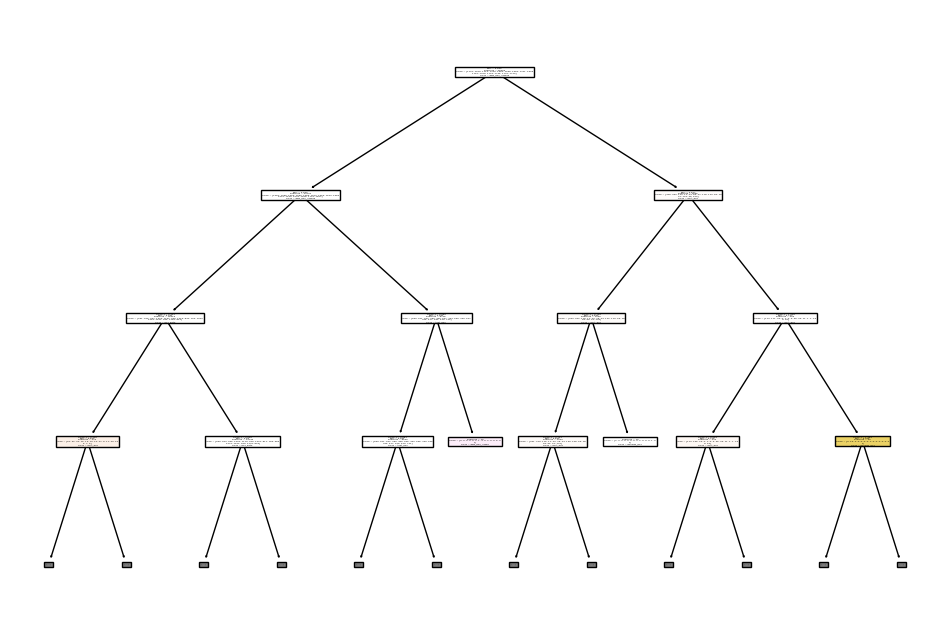

In [14]:
df = load_file(h_df_filename_rra)

features_df, labels_df = transform_df_features(df)
label_encoder, numeric_labels = column_enc(labels_df)
clf = construct_dt(features_df, numeric_labels)
print_tree(clf, label_encoder)